In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

Import the ratings dataframe and clean up some of the headings

In [2]:
ratingsDf = pd.read_csv('final_dataset.csv')
ratingsDf = ratingsDf.drop(['Unnamed: 0'], axis=1)
ratingsDf = ratingsDf.rename(columns={"mpaa rating":"mpaa_rating"})
ratingsDf

,title,country,date_added,release_year,mpaa_rating,duration,listed_in,description,user_rating
0,Limitless,United States,"July 1, 2016",2016,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy",A failed musician unleashes his brain's full p...,84.000000
1,Gilmore Girls: A Year in the Life,United States,"November 25, 2016",2016,TV-14,1 Season,"TV Comedies, TV Dramas, Teen TV Shows",Set nearly a decade after the finale of the or...,77.000000
2,Charmed,United States,"October 1, 2017",2005,TV-PG,8 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",After a trio of sisters discover an ancient te...,90.000000
3,Revenge,NaN,"May 2, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a mother and her daughter are gang-raped...,84.000000
4,The Jungle Book,"India, Germany, France","May 11, 2019",2010,TV-Y7,1 Season,Kids' TV,This animated series follows young Mowgli and ...,97.000000
5,American Crime Story: The People v. O.J. Simpson,United States,"March 6, 2019",2016,TV-MA,1 Season,"Crime TV Shows, TV Dramas",This anthology series dramatizes historic crim...,79.000000
6,Dave Chappelle,United States,"March 21, 2017",2017,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy icon Dave Chappelle makes his triumphan...,94.000000
7,Cheer Squad,United States,"March 14, 2017",2016,TV-PG,1 Season,"Reality TV, Teen TV Shows","Follow the Great White Sharks, a world-champio...",61.000000
8,Barbie Life in the Dreamhouse,United States,"July 1, 2017",2012,TV-G,1 Season,"Kids' TV, TV Comedies",Join blond icon Barbie and her fabulous friend...,85.000000
9,DreamWorks Shrek's Swamp Stories,United States,"August 17, 2012",2008,TV-PG,1 Season,"Kids' TV, TV Action & Adventure, TV Comedies","Shrek celebrates Halloween, Puss in Boots is c...",56.000000


Taking the work done from HW2 and using it to get information from our data

In [3]:
def get_quantile_indexes(n, p):
    '''
    Calculate index values as input for interpolation
    
    input
    _____
    n (list) - the list of numbers
    p (float) - the percentage corresponding to the quantile (ex:0.25)
    
    output
    ______
    l, i, u (float) - the corresponding x1, x, x1 values as calculated via class
    '''
    i = p*(n+1) - 1
    l = np.floor(i)
    u = np.ceil(i)
    return l,i,u


def get_quantile(nums, q):
    '''
    Use the in-class method of interpolation to calculate the quantile
    
    input
    _____
    nums (list) - the list of numbers
    q (float) - the quantile desired
    
    output
    ______
    y (int/float) - this is the value in nums at the given quantile q
    '''
    x1, x, x2 = get_quantile_indexes(len(nums), q)
    if np.floor(x) == x1 and np.ceil(x) == x1:
        x = int(x)
        y = nums[x]
        # print('x = {}, y = {}'.format(x, y))
        return y
        
    # print('x1, x, x2 = {}, {}, {}'.format(x1, x, x2))
    y1, y2 = nums[int(x1)], nums[int(x2)]
    # print('y1, y2 = {}, {}'.format(y1, y2))
    y = (x - x1) * (y1-y2) / (x1 - x2) + y1
    # print('y =', y)
    return y

def removeOutliers (numbers):
    '''
    Given a list, identify and remove the outliers
    
    input
    _____
    numbers (list) - the list of numbers
    '''
    outliers = []
    
    IQR = get_quantile(numbers, .75) - get_quantile(numbers, .25)
    firstZone = get_quantile(numbers, .25) - 1.5*(IQR)
    secondZone = get_quantile(numbers, .75) + 1.5*(IQR)
    
    for num in numbers:
        if (num < firstZone or num > secondZone):
            outliers.append(num)
    
    if (len(outliers) > 0):
        for num in outliers:
            numbers.remove(num)
        print ("The following are outliers: " + str(outliers))
    
def q_summary_V2 (dsInput):
    '''
    Give the quartlies, min, and max of a given list.

    input
    _____
    dsInput (list) - the data set given as a list

    output
    ______
    dataDict (dictionary) - A dictionary containing the quartiles, as well as the min and max.
    '''
    
    numbers = dsInput.copy()
    numbers.sort()
    dataDict = {}
    
    dataDict["Q1"] = get_quantile(numbers, .25)
    dataDict["Q2"] = get_quantile(numbers, .50)
    dataDict["Q3"] = get_quantile(numbers, .75)
    removeOutliers(numbers)
    dataDict["min"] = numbers[0]
    dataDict["max"] = numbers[-1]
    
    return dataDict

Create a dataframe with the average of each mpaa_rating, plot them out in a bar plot

In [31]:
mpaa_ratings = ['TV-14', 'TV-Y7', 'TV-MA', 'TV-Y', 'TV-PG', 'TV-G', 'TV-Y7-FV']
# Create a dataframe with MPAA Ratings as rows.
mpaa_df = pd.DataFrame({'MPAA_Rating':mpaa_ratings})

# Group the MPAA Ratings, create the final DF.
mpaa_groups = ratingsDf.groupby('mpaa_rating')
final_df = pd.DataFrame(columns = ['MPAA_Rating', 'User_Rating'])

# Loop through the mpaa_ratings, get the mean of each rating.
for mpaa_rating in mpaa_ratings:
    currRow = [mpaa_rating, round(mpaa_groups.get_group(mpaa_rating)['user_rating'].mean())]
    final_df = final_df.append(pd.Series(currRow, index=final_df.columns), ignore_index=True)

mpaa_ratings = final_df['MPAA_Rating'].tolist()
final_df = final_df.sort_values(by=['User_Rating'], ascending=False)
final_df

,MPAA_Rating,User_Rating
0,TV-14,88
1,TV-Y7,86
2,TV-MA,85
3,TV-Y,77
4,TV-PG,76
5,TV-G,73
6,TV-Y7-FV,72


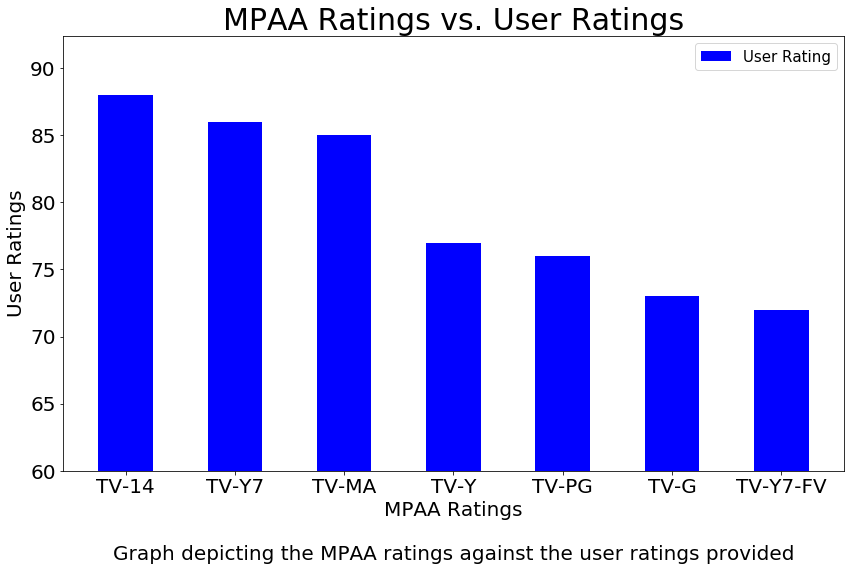

In [46]:
w = 0.5
label_locations = np.arange(final_df.shape[0])

plt.rc('font', size=20)
plt.rc('legend', fontsize=15)

plt.bar(label_locations, final_df['User_Rating'], width=w, label='User Rating', color='blue')
plt.gcf().set_size_inches(14, 8)
plt.ylim(bottom=60)
plt.title("MPAA Ratings vs. User Ratings", fontsize=30, fontweight=60)
plt.xlabel('MPAA Ratings\n\nGraph depicting the MPAA ratings against the user ratings provided')
plt.ylabel('User Ratings')
plt.xticks(label_locations, labels=mpaa_ratings)
plt.legend()
plt.show()

Loop through the ratings again, get information of each rating

In [44]:
noData = []
for mpaa_rating in mpaa_ratings:
    tempDf = ratingsDf.loc[ratingsDf['mpaa_rating'] == mpaa_rating]
    tempArr = []
    for ind in tempDf.index: 
        tempArr.append(tempDf['user_rating'][ind])
    if (len(tempArr) > 2):
        print(f"Rating: {mpaa_rating} (n={len(tempArr)})\n{q_summary_V2(tempArr)}")
    else:
        noData.append({mpaa_rating:tempArr})
    print(f"Median: {np.median(tempArr)}, Average: {np.mean(tempArr)}")
    print("--------------------")

print (noData)

Rating: TV-14 (n=24)
{'Q1': 80.0, 'Q2': 91.0, 'Q3': 94.75, 'min': 69.0, 'max': 98.0}
Median: 91.0, Average: 87.91666666666667
--------------------
Rating: TV-PG (n=9)
{'Q1': 59.5, 'Q2': 81.0, 'Q3': 89.0, 'min': 56.0, 'max': 92.0}
Median: 81.0, Average: 76.11111111111111
--------------------
The following are outliers: [56.0, 57.0]
Rating: TV-MA (n=14)
{'Q1': 79.75, 'Q2': 89.0, 'Q3': 94.25, 'min': 79.0, 'max': 97.0}
Median: 89.0, Average: 84.64285714285714
--------------------
Rating: TV-Y7 (n=3)
{'Q1': 72.0, 'Q2': 88.66666666666669, 'Q3': 97.0, 'min': 72.0, 'max': 97.0}
Median: 88.66666666666669, Average: 85.8888888888889
--------------------
Median: 73.0, Average: 73.0
--------------------
Rating: TV-Y (n=4)
{'Q1': 69.5, 'Q2': 79.0, 'Q3': 81.75, 'min': 67.0, 'max': 82.0}
Median: 79.0, Average: 76.75
--------------------
Median: 72.0, Average: 72.0
--------------------
[{'TV-G': [85.0, 61.0]}, {'TV-Y7-FV': [73.0, 71.0]}]
